# Importing primary libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the heart dataset

In [301]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Let's get more information about our datasets

In [252]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [253]:
df.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

# Cleaning the Dataset

<AxesSubplot:>

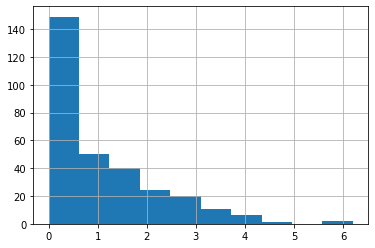

In [254]:
df['oldpeak'].hist()

In [255]:
df['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

# Train/Test data

In [468]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['output', 'trtbps','age', 'chol', 'thalachh'] ,axis=1).values
y = df['output'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print('Train shape: ', x_train.shape, y_train.shape)
print('Test shape: ', x_test.shape, y_test.shape)

Train shape:  (242, 9) (242,)
Test shape:  (61, 9) (61,)


### KNN model is more suitable for binary and discontinuous datas, So I removed the continuous values from the X array.

In [469]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x = scaler.transform(x.astype(float))

# KNN Algorithm

In [470]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

## Model training and prediction on test data

In [471]:
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)

# Evaluation

In [472]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

In [473]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [474]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

## Confusion matrix for KNN model

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix, without normalization
[[26  3]
 [ 7 25]]


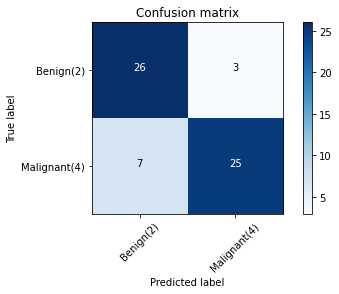

In [475]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### According to the confusion matrix, there were only 7 people whose heart attack was malignant, and we predicted it to be benign, and we also correctly diagnosed the malignant heart attack of 25 people, which is an acceptable statistic.

## f1 score for KNN model

In [478]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='weighted') 

0.835889300193901

# Classification report

In [479]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#### lets try the next algorithm

# Decision Tree Algorithm

## Pre-processing

In [517]:
x = df.drop(columns=['output']).values
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [518]:
y = df['output']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

# Setting up the Decision Tree
### Train/Test split

In [519]:
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

# Modeling

In [520]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=4)

## Model training and prediction on test data

In [521]:
dt.fit(x_train, y_train)
y_hat = dt.predict(x_test)

# Evaluation

In [522]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

In [523]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Confusion matrix for Decision Tree model

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion matrix, without normalization
[[26  3]
 [ 6 26]]


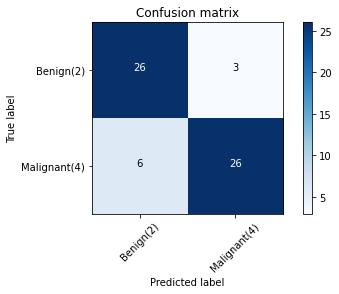

In [524]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### According to the confusion matrix, there were only 6 people whose heart attack was malignant, and we predicted it to be benign, and we also correctly diagnosed the malignant heart attack of 26 people, which is an acceptable statistic.

# f1-score for DecisionTree Model

In [526]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='weighted') 

0.8524590163934426

# Classification report

In [125]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



lets go for the next Algorithm

# SVM Algorithm

## Pre-processing

In [596]:
x = df.drop(columns=['output', 'thalachh']).values
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. ,   0. ,   2.3,
          0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. ,   0. ,   3.5,
          0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. ,   0. ,   1.4,
          2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. ,   0. ,   0.8,
          2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. ,   1. ,   0.6,
          2. ,   0. ,   2. ]])

In [597]:
y = df['output'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Setting up SVM
### Train/Test split

In [598]:
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

# Modeling

In [605]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')

## Model training and prediction on test data¶

In [606]:
svm.fit(x_train, y_train)
y_hat = svm.predict(x_test)

# Evaluation

In [607]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

In [608]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Confusion matrix for SVM model

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[24  5]
 [ 3 29]]


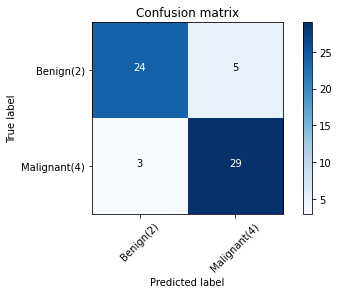

In [609]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### According to the confusion matrix, there were only 3 people whose heart attack was malignant, and we predicted it to be benign, and we also correctly diagnosed the malignant heart attack of 29 people, which is an acceptable statistic.

## f1-score for SVM Model

In [610]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='weighted') 

0.8684976225959832

# Classification report

In [611]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Logistic Regression Algorithm

## Pre-processing

In [612]:
x = df.drop(columns=['output', 'sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'slp', 'thall']).values
x[0:5]

array([[ 63. , 145. , 233. , 150. ,   2.3],
       [ 37. , 130. , 250. , 187. ,   3.5],
       [ 41. , 130. , 204. , 172. ,   1.4],
       [ 56. , 120. , 236. , 178. ,   0.8],
       [ 57. , 120. , 354. , 163. ,   0.6]])

### Logistic Regression model is more suitable for continues values, So I removed the uncontinuous values from the X array.

In [613]:
y = df['output'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Setting up Logistic Regression
### Train/Test split

In [614]:
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

# Modeling

In [615]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

## prediction on test data¶

In [616]:
y_hat = lr.predict(x_test)

In [617]:
y_hat_prob = lr.predict_proba(x_test)

# Evaluation

## Confusion matrix for Logistic Regression model

In [618]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[29  3]
 [ 3 26]]


Confusion matrix, without normalization
[[29  3]
 [ 3 26]]


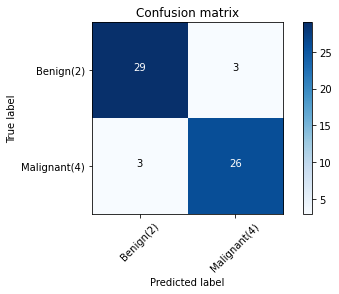

In [622]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### According to the confusion matrix, there were only 3 people whose heart attack was malignant, and we predicted it to be benign, and we also correctly diagnosed the malignant heart attack of 26 people, which is an acceptable statistic.

## f1-score for Logistic Regression

In [620]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='weighted') 

0.9016393442622951

## Classification report

In [621]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

